In [1]:
import re
import numpy
import peakutils
from peakutils.plot import plot as pplot
from matplotlib import pyplot

In [2]:
%matplotlib inline

### Read in entire bedgraph file

In [ ]:
fin = open("/Users/jordanburke/Documents/JEB/HTSeq/JEB002/150904BAMFILES/CM763-A.bedGraph","r")
chr1_x = []
chr1_y = []
for line in fin:
    n = 1
    if line.startswith('chr1'):
        columns = re.split(r'\t+', line)
        chr1_x.append(columns[1])
        chr1_y.append(columns[3])
chr1_x = [ int(x) for x in chr1_x  ]
chr1_y = [ int(y) for y in chr1_y  ]
chr1_x = numpy.array(chr1_x)
chr1_y = numpy.array(chr1_y)
print len(chr1_x)
print len(chr1_y)

### Pull out CNAG_06699T0

In [27]:
fin = open("/Users/jordanburke/Documents/JEB/HTSeq/JEB002/150904BAMFILES/CM764-A_5p.bedGraph","r")
fout = open("/Users/jordanburke/RNA-is-awesome/SP_analysis/PEAKPICKING/6699_test.bedgraph","w")
for line in fin:
    if line.startswith('chr7'):
        columns = re.split(r'\t+', line)
        if int(columns[1]) > 523683 and int(columns[2]) < 526070:
            fout.write(line)            

### Pull out CNAG_00465T0

In [ ]:
fin = open("/Users/jordanburke/Documents/JEB/HTSeq/JEB002/150904BAMFILES/CM764-A_5p.bedGraph","r")
fout = open("/Users/jordanburke/RNA-is-awesome/SP_analysis/PEAKPICKING/465_test.bedgraph","w")
for line in fin:
    if line.startswith('chr1'):
        columns = re.split(r'\t+', line)
        if int(columns[1]) > 1208203 and int(columns[2]) < 1209072:
            fout.write(line)            

### Use this to make numpy arrays of all positions in bedgraph for specific gene

In [28]:
fin = open("/Users/jordanburke/RNA-is-awesome/SP_analysis/PEAKPICKING/465_test.bedgraph","r")
chr1_x = []
chr1_y = []
for line in fin:
    n = 1
    if line.startswith('chr1'):
        columns = re.split(r'\t+', line)
        if len(columns) >= 4:
            chr1_x.append(columns[1])
            chr1_y.append(columns[3])
chr1_x = [ int(x) for x in chr1_x  ]
chr1_y = [ int(y) for y in chr1_y  ]
chr1_x = numpy.array(chr1_x)
chr1_y = numpy.array(chr1_y)
print len(chr1_x)
print len(chr1_y)

212
212


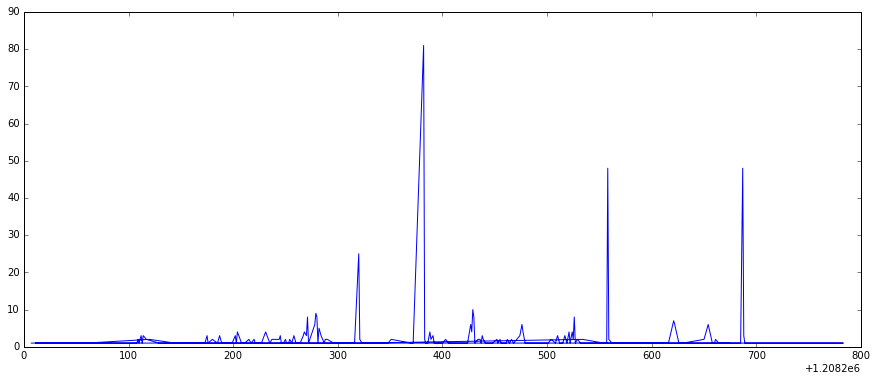

In [29]:
pyplot.figure(figsize=(15,6))
pyplot.plot(chr1_x,chr1_y)

[ 31  40  58  60  63  66  76  85  89 103 105 126 141 143 145 153 166 172
 179]
[1208404 1208431 1208468 1208471 1208479 1208482 1208520 1208582 1208588
 1208627 1208629 1208676 1208721 1208724 1208726 1208758 1208821 1208854
 1208887]


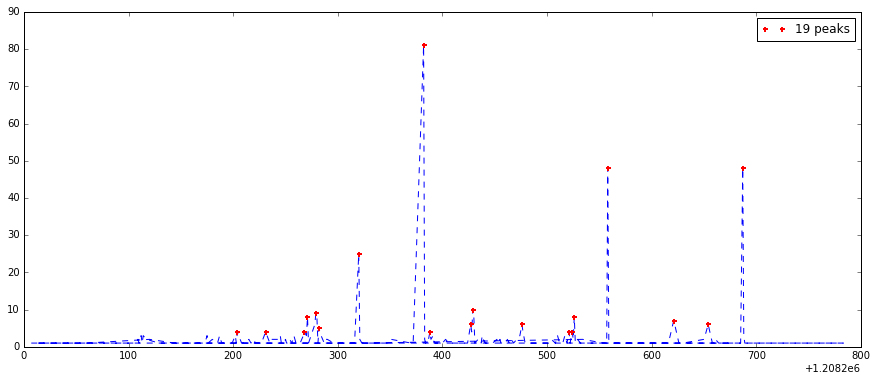

In [34]:
indexes = peakutils.indexes(chr1_y, thres=0.04, min_dist=1)
print(indexes)
print(chr1_x[indexes])
pyplot.figure(figsize=(15,6))
pplot(chr1_x, chr1_y, indexes)

In [205]:
numpy.savetxt("test_indexes.txt", chr1_x[indexes], fmt='%i')

In [32]:
fin = open("/Users/jordanburke/RNA-is-awesome/CNA3_FINAL_CALLGENES_1_gobs.gff3","r")
fivePsites = []
threePsites = []
for line in fin:
    if line.startswith("chr7"):
        columns = re.split(r'\t+', line)
        if columns[2] == "exon":
            if columns[6] == "+":
                fivePsites.append(int(columns[4])-1)
                threePsites.append(int(columns[3])-2)
            if columns[6] == "-":
                fivePsites.append(int(columns[3])-1)
                threePsites.append(int(columns[4]))
#fivePsites = [ int(x) for x in fivePsites ]
#threePsites = [ int(y) for y in threePsites  ]
print len(fivePsites)
print len(threePsites)
allsites = fivePsites+threePsites
print len(allsites)

3726
3726
7452


In [196]:
allhits = []
allmisses = []
for site in allsites:
    if site in chr1_x[indexes]:
        allhits.append(site)
    else:
        allmisses.append(site)
print "Of "+str(len(allsites))+" sites:"
print str(len(allhits))+" hits, "+str(len(allhits)/len(allsites)*100)+"%" 
print str(len(allmisses))+" misses,"+str(len(allmisses)/len(allsites)*100)+"%"

Of 40204 sites:
5 hits, 0%
40199 misses,0%


In [107]:
fivePhits = []
fivePmisses = []
for site in fivePsites:
    if site in indexes:
        fivePhits.append(site)
    else:
        fivePmisses.append(site)
print "Of "+str(len(fivePsites))+" sites:"
print str(len(fivePhits))+" hits, "+str(len(fivePhits)/len(fivePsites)*100)+"%" 
print str(len(fivePmisses))+" misses,"+str(len(fivePmisses)/len(fivePsites)*100)+"%"

Of 60306 sites:
75 hits, 0%
60231 misses,0%


In [84]:
threePhits = []
threePmisses = []
for site in threePsites:
    if site in indexes:
        threePhits.append(site)
    else:
        threePmisses.append(site)
print "Of "+str(len(threePsites))+" sites:"
print str(len(threePhits))+" hits, "+str(len(threePhits)/len(threePsites)*100)+"%" 
print str(len(threePmisses))+" misses,"+str(len(threePmisses)/len(threePsites)*100)+"%"

Of 20102 sites:
32 hits, 0%
20070 misses,0%


In [5]:
def list_splice_sites(gff3_file, chromosome, gene_list=None, sites="All"):
    fin = open(gff3_file,"r")
    fivePsites = []
    threePsites = []
    for line in fin:
        if line.startswith("chr7"):
            columns = re.split(r'\t+', line)
            CNAG = columns[8].strip()
            CNAG = CNAG[-12:]      
            if gene_list is None:
                if columns[2] == "exon":
                    if columns[6] == "+":
                        fivePsites.append(int(columns[4])-1)
                        threePsites.append(int(columns[3])-2)
                    if columns[6] == "-":
                        fivePsites.append(int(columns[3])-1)
                        threePsites.append(int(columns[4]))
            else:
                if CNAG in gene_list and columns[2] == "exon":
                    if columns[6] == "+":
                        fivePsites.append(int(columns[4])-1)
                        threePsites.append(int(columns[3])-2)
                    if columns[6] == "-":
                        fivePsites.append(int(columns[3])-1)
                        threePsites.append(int(columns[4]))
                    
    print "Five prime splice sites: " +str(len(fivePsites))
    print "Three prime splice sites: " +str(len(threePsites))
    allsites = fivePsites+threePsites
    if sites == "All":
        return allsites
    elif sites == "3p":
        return threePsites
    elif sites == "5p":
        return fivePsites

In [24]:
def peaks_by_gene(gff3_file, bedgraph_file, chromosome, gene_list=None):
    gff3 = open(gff3_file,"r")
    transcript_dict = {}
    splice_sites = list_splice_sites(gff3_file, chromosome, gene_list=gene_list)
    for line in gff3:
        if line.startswith(chromosome):
            columns = re.split(r'\t+', line)
            if columns[2] == "mRNA":
                CNAG = columns[8]
                CNAG = CNAG[3:15]
                transcript_dict[CNAG] = [int(columns[3]), int(columns[4]), columns[6]]
    
    if gene_list is not None:
        transcript_dict = dict([(CNAG, transcript_dict[CNAG]) for CNAG in gene_list])

    hits = []
    misses = []
    counter = 0
    for CNAG, coords in transcript_dict.iteritems():
        bedgraph = open(bedgraph_file,"r")
        bygene_x = []
        bygene_y = []
        for line in bedgraph:
            if line.startswith(chromosome):
                columns = re.split(r'\t+', line)
                if int(columns[1]) > coords[0] and int(columns[1]) < coords[1]:
                    bygene_x.append(int(columns[1]))
                    bygene_y.append(int(columns[3]))
        bygene_x = numpy.array(bygene_x)
        bygene_y = numpy.array(bygene_y)
        with open("test_arrays.txt","a") as f_handle:
            numpy.savetxt(f_handle, bygene_x, fmt='%i')
        

        if numpy.sum(bygene_y) > 100:
            indexes = peakutils.indexes(bygene_y, thres=0.05, min_dist=1)
            
            if gene_list is not None:
                print CNAG
                print(bygene_x[indexes])
                pyplot.figure(figsize=(15,6))
                pplot(bygene_x, bygene_y, indexes)
            
            
            with open("{0}_indexes.txt".format(chromosome),"a") as f_handle:
                numpy.savetxt(f_handle, bygene_x[indexes], fmt='%i')
        

            for site in splice_sites:
                if site in bygene_x[indexes]:
                    hits.append(site)
                else:
                    misses.append(site)
            
            counter += 1
    
    print counter
    print "Of "+str(len(splice_sites))+" sites:"
    print str(len(hits))+" hits "#+str(len((allhits)/len(allsites))*100)+"%" 
    #print str(len(allmisses))+" misses," +str(len(allmisses)/len(allsites)*100)+"%"

Five prime splice sites: 20
Three prime splice sites: 20
CNAG_06699T0
[523916 523951 523953 524020 524045 524099 524144 524195 524220 524275
 524299 524355 524388 524407 524422 524500 524523 524541 524561 524563
 524591 524653 524694 524698 524709 524714 524765 524768 524827 524904
 524906 524966 524996 525031 525077 525108 525119 525146 525151 525207
 525209 525241 525243 525259 525312 525321 525340 525394 525427 525482
 525542 525544 525546 525624]
CNAG_05698T0
[645648 645693 645823 645943 646016 646187 646236 646356 646388 646398
 646400 646474]
2
Of 40 sites:
29 hits 


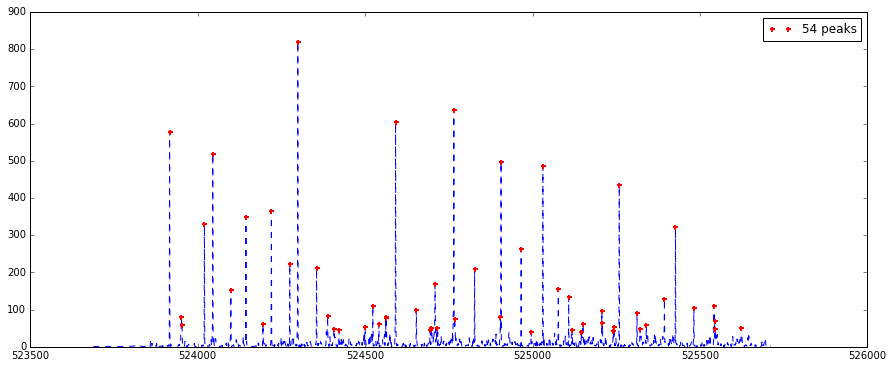

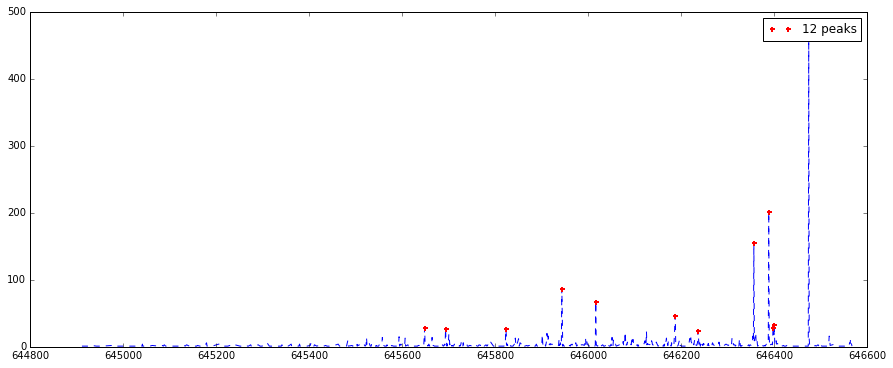

In [25]:
peaks_by_gene("/Users/jordanburke/RNA-is-awesome/CNA3_FINAL_CALLGENES_1_gobs.gff3", "/Users/jordanburke/Documents/JEB/HTSeq/JEB002/150904BAMFILES/CM764-A_5p.bedGraph", "chr7", gene_list=["CNAG_05698T0", "CNAG_06699T0"])

In [26]:
peaks_by_gene("/Users/jordanburke/RNA-is-awesome/CNA3_FINAL_CALLGENES_1_gobs.gff3", "/Users/jordanburke/Documents/JEB/HTSeq/JEB002/150904BAMFILES/CM764-A_5p.bedGraph", "chr7")

Five prime splice sites: 3726
Three prime splice sites: 3726
370
Of 7452 sites:
3485 hits 


In [38]:
(3485./7452)*100.

46.765968867418145